In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

An image consists of an image height, image width and color channels (RGB).

A convolutional neural network learns local patterns such that even if an image is inverted, it will recognize it unlike the Dense Neural Network that recognizes global patterns. The presence of filters is what makes it possible for Convolutional Neural Network to recognize local patterns. Each convolution layer searches for different kinds of filters. 
The filters work via element-wise multiplication between the image sample and the pattern we are looking for.
Padding helps recognize patterns at the edges that the filters would normally miss.
Stride is based on how the filters moves over the image.
Pooling: Extracts the presence of a feature in a local area.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255., test_images/255.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 3s 0us/step


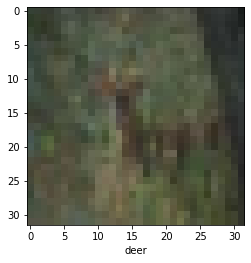

In [ ]:
IMG_INDEX = 10
plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

CNN Architecture

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation= 'relu'))

In [ ]:
# Let's add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training the Model

In [ ]:
model.compile(optimizer= 'adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4305 - accuracy: 0.8468 - val_loss: 0.9849 - val_accuracy: 0.7065
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.3903 - accuracy: 0.8609 - val_loss: 1.0944 - val_accuracy: 0.6972
Epoch 3/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.3579 - accuracy: 0.8716 - val_loss: 1.1459 - val_accuracy: 0.7011
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.3218 - accuracy: 0.8852 - val_loss: 1.2253 - val_accuracy: 0.6966
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.2977 - accuracy: 0.8930 - val_loss: 1.2957 - val_accuracy: 0.6904
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.2776 - accuracy: 0.8996 - val_loss: 1.3432 - val_accuracy: 0.6954
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.2602 - accuracy: 0.9064 - val_loss: 1.4313 -

In [ ]:
plt.plot(history.history())

TypeError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 1.7022 - accuracy: 0.6874
0.6873999834060669
